In [21]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from shapely.geometry import Point
from geopandas import GeoDataFrame
from keplergl import KeplerGl
import geopandas
from geopandas import datasets, GeoDataFrame, read_file

In [4]:
# Data snapshot from 3/11/2022
# https://donnees.montreal.ca/ville-de-montreal/actes-criminels
data = pd.read_csv("data/montreal_crime_data.csv", encoding='latin1')
pdq = read_file("data/limitespdq.csv", encoding='latin1')

In [5]:
data.head()
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.LONGITUDE, data.LATITUDE))
gdf

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE,geometry
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,POINT (-73.62678 45.56778)
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,POINT (-73.62678 45.56778)
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,POINT (-73.68593 45.51912)
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,-76.237290,0.000000,POINT (-76.23729 0.00000)
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,-76.237290,0.000000,POINT (-76.23729 0.00000)
...,...,...,...,...,...,...,...,...,...
217330,Introduction,2022-02-07,nuit,16.0,299824.031000,5.036239e+06,-73.563634,45.466061,POINT (-73.56363 45.46606)
217331,Vol dans / sur véhicule à moteur,2022-02-07,nuit,9.0,294066.934990,5.034838e+06,-73.637226,45.453390,POINT (-73.63723 45.45339)
217332,Vol de véhicule à moteur,2022-02-07,nuit,46.0,299275.233995,5.053407e+06,-73.570845,45.620542,POINT (-73.57085 45.62054)
217333,Introduction,2022-02-07,nuit,23.0,301302.350009,5.046445e+06,-73.544801,45.557905,POINT (-73.54480 45.55791)


In [6]:
pdq.head()
gdf.crs = pdq.crs

In [7]:
join_left_df = gdf.sjoin(pdq, how="left")
join_left_df

,CATEGORIE,DATE,QUART,PDQ_left,X,Y,LONGITUDE,LATITUDE,geometry,index_right,PDQ_right,NOM_PDQ,WKT
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,POINT (-73.68593 45.51912),4.0,7,PDQ-7,MULTIPOLYGON (((-73.6723999995738 45.532500000...
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,-76.237290,0.000000,POINT (-76.23729 0.00000),NaN,NaN,NaN,NaN
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,-76.237290,0.000000,POINT (-76.23729 0.00000),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217330,Introduction,2022-02-07,nuit,16.0,299824.031000,5.036239e+06,-73.563634,45.466061,POINT (-73.56363 45.46606),11.0,16,PDQ-16,MULTIPOLYGON (((-73.5480000004172 45.470200000...
217331,Vol dans / sur véhicule à moteur,2022-02-07,nuit,9.0,294066.934990,5.034838e+06,-73.637226,45.453390,POINT (-73.63723 45.45339),6.0,9,PDQ-9,MULTIPOLYGON (((-73.6310000000522 45.479000000...
217332,Vol de véhicule à moteur,2022-02-07,nuit,46.0,299275.233995,5.053407e+06,-73.570845,45.620542,POINT (-73.57085 45.62054),27.0,46,PDQ-46,MULTIPOLYGON (((-73.5510999998078 45.626900000...
217333,Introduction,2022-02-07,nuit,23.0,301302.350009,5.046445e+06,-73.544801,45.557905,POINT (-73.54480 45.55791),15.0,23,PDQ-23,MULTIPOLYGON (((-73.5513000003994 45.567399999...


## Preprocessing & exploring

In [8]:
data = join_left_df.dropna()

In [9]:
data

,CATEGORIE,DATE,QUART,PDQ_left,X,Y,LONGITUDE,LATITUDE,geometry,index_right,PDQ_right,NOM_PDQ,WKT
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,POINT (-73.68593 45.51912),4.0,7,PDQ-7,MULTIPOLYGON (((-73.6723999995738 45.532500000...
6,Méfait,2017-07-30,jour,38.0,297654.715002,5.041877e+06,-73.591457,45.516776,POINT (-73.59146 45.51678),22.0,38,PDQ-38,MULTIPOLYGON (((-73.5741999996826 45.541400000...
8,Vol dans / sur véhicule à moteur,2017-08-01,jour,39.0,294259.780993,5.051450e+06,-73.635117,45.602873,POINT (-73.63512 45.60287),23.0,39,PDQ-39,MULTIPOLYGON (((-73.6032999996096 45.610899999...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217329,Introduction,2022-02-07,nuit,31.0,295631.677000,5.043925e+06,-73.617390,45.535180,POINT (-73.61739 45.53518),21.0,35,PDQ-35,MULTIPOLYGON (((-73.5985000003129 45.552100000...
217330,Introduction,2022-02-07,nuit,16.0,299824.031000,5.036239e+06,-73.563634,45.466061,POINT (-73.56363 45.46606),11.0,16,PDQ-16,MULTIPOLYGON (((-73.5480000004172 45.470200000...
217331,Vol dans / sur véhicule à moteur,2022-02-07,nuit,9.0,294066.934990,5.034838e+06,-73.637226,45.453390,POINT (-73.63723 45.45339),6.0,9,PDQ-9,MULTIPOLYGON (((-73.6310000000522 45.479000000...
217332,Vol de véhicule à moteur,2022-02-07,nuit,46.0,299275.233995,5.053407e+06,-73.570845,45.620542,POINT (-73.57085 45.62054),27.0,46,PDQ-46,MULTIPOLYGON (((-73.5510999998078 45.626900000...


In [15]:
data.columns

Index(['CATEGORIE', 'DATE', 'QUART', 'PDQ_left', 'X', 'Y', 'LONGITUDE',
       'LATITUDE', 'geometry', 'index_right', 'PDQ_right', 'NOM_PDQ', 'WKT'],
      dtype='object')

#### Meta information of data

In [10]:
print(f"Shape of data is: {data.shape}")

Shape of data is: (176781, 13)


In [11]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
CATEGORIE,object
DATE,object
QUART,object
PDQ_left,float64
X,float64
Y,float64
LONGITUDE,float64
LATITUDE,float64
geometry,geometry


## Data cleaning

In [12]:
coordinates = [Point(xy) for xy in zip(data["LONGITUDE"], data["LATITUDE"])]
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(data, crs=crs, geometry=coordinates)

C:\Users\HazoT\miniconda3\crime\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [13]:
to_drop = ['X', 'Y', 'LONGITUDE', 'LATITUDE']
data.drop(to_drop, inplace=True, axis=1)

C:\Users\HazoT\AppData\Local\Temp\ipykernel_12180\3010286192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(to_drop, inplace=True, axis=1)


In [14]:
data.head()

,CATEGORIE,DATE,QUART,PDQ_left,geometry,index_right,PDQ_right,NOM_PDQ,WKT
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,POINT (-73.68593 45.51912),4.0,7,PDQ-7,MULTIPOLYGON (((-73.6723999995738 45.532500000...
6,Méfait,2017-07-30,jour,38.0,POINT (-73.59146 45.51678),22.0,38,PDQ-38,MULTIPOLYGON (((-73.5741999996826 45.541400000...
8,Vol dans / sur véhicule à moteur,2017-08-01,jour,39.0,POINT (-73.63512 45.60287),23.0,39,PDQ-39,MULTIPOLYGON (((-73.6032999996096 45.610899999...


In [15]:
data['DATE'] = pd.to_datetime(data['DATE'])

C:\Users\HazoT\miniconda3\crime\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
data['DATE'].head()

0   2018-09-13
1   2018-04-30
2   2018-09-01
6   2017-07-30
8   2017-08-01
Name: DATE, dtype: datetime64[ns]

In [17]:
datatypes = pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')
datatypes

,Datatype
Columns,
CATEGORIE,object
DATE,datetime64[ns]
QUART,object
PDQ_left,float64
geometry,geometry
index_right,float64
PDQ_right,object
NOM_PDQ,object
WKT,object


In [22]:
from datetime import date
import calendar
day_of_week = []
for date in data['DATE']:
    day_of_week.append(calendar.day_name[date.weekday()])
data['day_of_week'] = day_of_week
#data['day_of_week'].drop_duplicates()
data['day_of_week'][2]

'Saturday'

In [23]:
def add_is_weekend(df):
    res = []
    for day in df['day_of_week']:
        if day in ['Saturday', 'Sunday']: res.append(True)
        else: res.append(False)
    df['is_weekend'] = res

In [24]:
add_is_weekend(data)
data.head()

,CATEGORIE,DATE,QUART,PDQ_left,geometry,index_right,PDQ_right,NOM_PDQ,WKT,day_of_week,is_weekend
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...,Thursday,False
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,POINT (-73.62678 45.56778),18.0,30,PDQ-30,MULTIPOLYGON (((-73.6140999998897 45.579800000...,Monday,False
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,POINT (-73.68593 45.51912),4.0,7,PDQ-7,MULTIPOLYGON (((-73.6723999995738 45.532500000...,Saturday,True
6,Méfait,2017-07-30,jour,38.0,POINT (-73.59146 45.51678),22.0,38,PDQ-38,MULTIPOLYGON (((-73.5741999996826 45.541400000...,Sunday,True
8,Vol dans / sur véhicule à moteur,2017-08-01,jour,39.0,POINT (-73.63512 45.60287),23.0,39,PDQ-39,MULTIPOLYGON (((-73.6032999996096 45.610899999...,Tuesday,False


#### Checking for NaN values

In [25]:
pd.DataFrame(data.isnull().sum(), columns=['Nb of missing values']).rename_axis('Feature')

,Nb of missing values
Feature,
CATEGORIE,0
DATE,0
QUART,0
PDQ_left,0
geometry,0
index_right,0
PDQ_right,0
NOM_PDQ,0
WKT,0


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

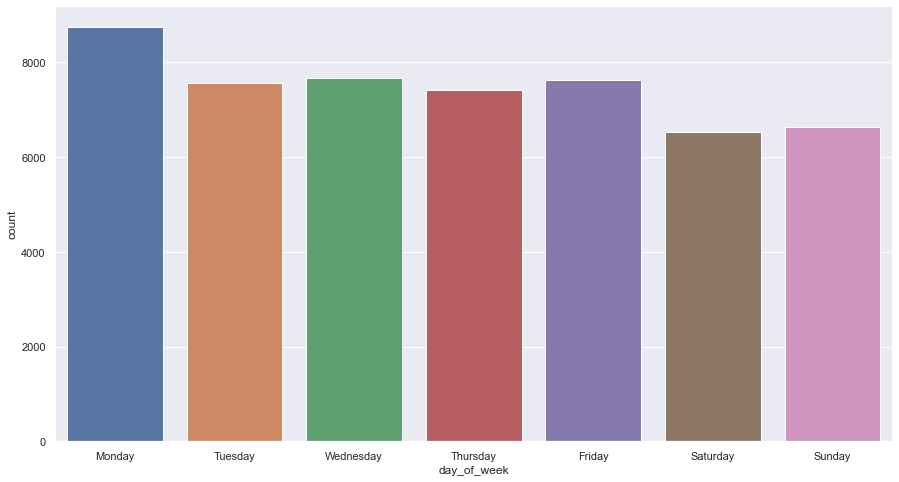

In [26]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data['day_of_week'] = data['day_of_week'].astype(cat_type)
sns.set(rc = {'figure.figsize':(15,8)})
data_introd = data[data['CATEGORIE'] == 'Introduction']
sns.countplot(x="day_of_week", data=data_introd)
#sns.histplot(x="day_of_week", y="CATEGORIE", data=data_introd)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

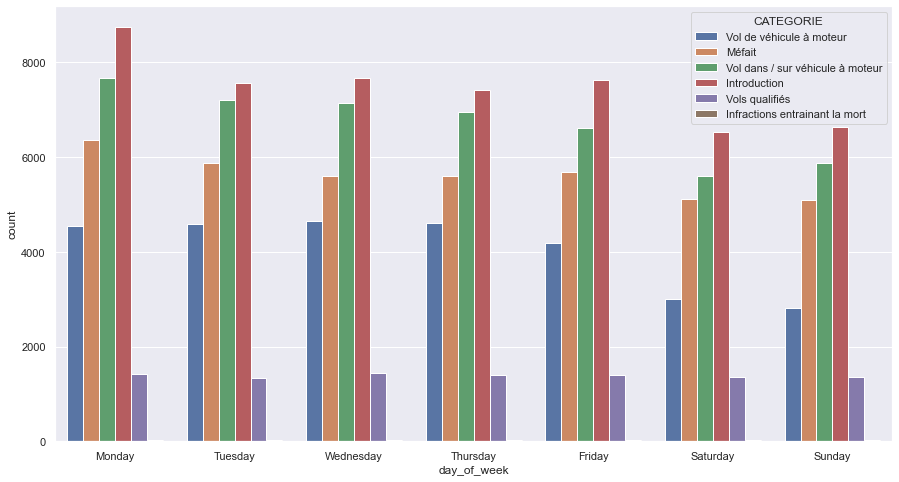

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="day_of_week", hue="CATEGORIE", data=data)

## Visualization

In [28]:
from shapely.geometry import Point, mapping, shape
for coord in data['geometry']:
    res = []
    mapping(coord)
    #{'type': 'Point', 'coordinates': (3.0, 4.0)}
    # and the reverse
    shape(mapping(coord))
    res.append(coord)
print(res)
res = pd.DataFrame(res)

In [30]:
from keplergl import KeplerGl
map1 = KeplerGl(height=500)
map1
map1.add_data(data=data, name='Montreal\'s crime plot')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [31]:
map1.save_to_html(file_name='mtl_crime-customize.html')

In [32]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import geojson as gj
import json

In [33]:
state = ox.geocode_to_gdf('Quebec, CA')
ax = ox.project_gdf(state).plot(fc='gray', ec='none')
_ = ax.axis('off')

In [34]:
# Defining the map boundaries 
north, east, south, west = 45.6923, -73.3736, 45.3874, -73.9730  
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  
# Plotting the map graph 
ox.plot_graph(G)

In [35]:
origin_point = (45.5173538,-73.58212888)
destination_point = (45.539385081961676,-73.54099988937377)
# get the nearest nodes to the locations 
origin_node = ox.get_nearest_node(G, origin_point) 
destination_node = ox.get_nearest_node(G, destination_point)
# Finding the optimal path 
route = nx.shortest_path(G, origin_node, destination_node, weight = 'length')
print(route)

In [36]:
#store long, lat
long = [] 
lat = []  
for i in route:
     point = G.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

In [37]:
#store long, lat
""""string = ""{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "vendor":  "A"
      },
      "geometry": {
        "type": "LineString",
        "coordinates": [
          [-74.20986, 40.81773, 0],
          [-74.20987, 40.81765, 0],
          [-74.20998, 40.81746, 0]
        ]
      }
    }
  ]
}"""
first_string = "{\"type\": \"FeatureCollection\",\"features\": [{\"type\": \"Feature\",\"properties\": {\"vendor\":  \"A\"},\"geometry\": {\"type\": \"LineString\",\"coordinates\": [ "
coordinates = ""
long = [] 
lat = []  
for i in route: 
    point = G.nodes[i]
    print(point)
    long.append(point['x'])
    lat.append(point['y'])
    long_lat = "[" + str(point['x']) + "," + str(point['y']) + "],\n"
    coordinates += long_lat
final_string = "]}}]}"
string = first_string + coordinates + final_string
print(string)
print(len(route))
file2write=open("pathh",'w')
file2write.write(string)
file2write.close()

In [38]:
def plot_path(lat, long, origin_point, destination_point):
  
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'purple')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [ ]:
plot_path(lat, long, origin_point, destination_point)